In [368]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


(100,)
(100,)


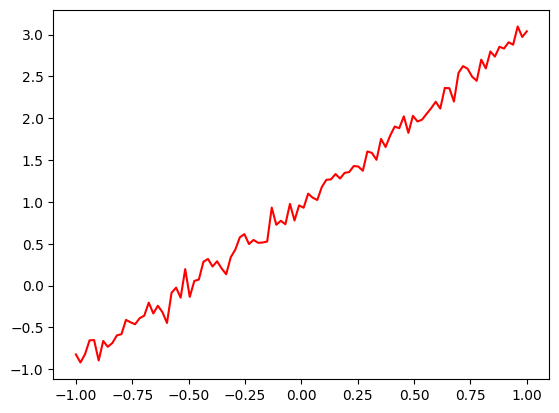

In [369]:
# Generate some data: y = 2x + 1 with some noise
np.random.seed(0)
x = np.linspace(-1, 1, 100)
y = 2 * x + 1 + np.random.normal(0, 0.1, x.shape)
print(x.shape)
print(y.shape)

plt.plot(x, y, color='red', label="Noisy function")

In [370]:
# Initialize parameters randomly (weight and bias)
weight = np.random.randn()
bias = np.random.randn()
print(weight, bias)

# Hyperparameters
learning_rate = 0.01
epochs = 120

dw_values = []
db_values = []
loss_values = []


1.8831506970562544 -1.3477590611424464


In [371]:
# Define the simple linear model (y_pred = weight*x+bias)
def forward_pass(x, weight, bias):
    return weight*x+bias

# Define the gradient calculation for weights and bias
def compute_gradients(x, y_true, y_pred):
    dL_dw = -2 * np.mean(x*(y_true-y_pred))
    dL_db = -2 * np.mean(y_true-y_pred)
    
    return dL_dw, dL_db

# Update the weights and biases with the help of gradients
def update_params(weight, bias, dL_dw, dL_db):
    weight -= dL_dw * learning_rate
    bias -= dL_db * learning_rate
    return weight, bias

# Define the Mean Squared Error (MSE) loss function
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [372]:
def update():
    global weight, bias, x, y, learning_rate

    # Forward pass: Calculate predicted values using current weight and bias
    y_pred = forward_pass(x,weight,bias)
    
    plt.plot(x, y, color='red', label="Noisy function")
    plt.plot(x, y_pred, color='blue', label="Predictions")
    

    # Calculate gradients for back propagation
    [dL_dw, dL_db] = compute_gradients(x, y, y_pred)
    print("dL/dw is:", dL_dw, "\ndL/db is:" , dL_db)

    # To plot gradients
    db_values.append(dL_db)
    dw_values.append(dL_dw)
    
    # To plot loss
    loss = mse_loss(y,y_pred)
    loss_values.append(loss)
    
    weight, bias = update_params(weight, bias, dL_dw, dL_db)

    print("up-to-date weight:", weight,"bias:", bias)
    print("loss: ", loss)


dL/dw is: -0.06936214768357155 
dL/db is: -4.7074797253917895
up-to-date weight: 1.8838443185330902 bias: -1.3006842638885285
loss:  5.553711328334786


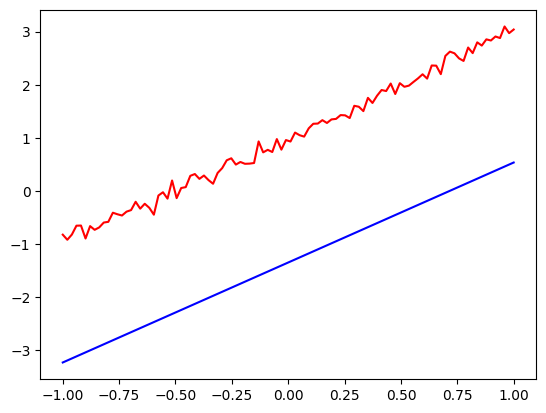

In [373]:
# Every time we call update it is supposed to update weight and
# bias so that the loss value is minimized, 
# so the blue line (predicted values) will approach to real values
update()

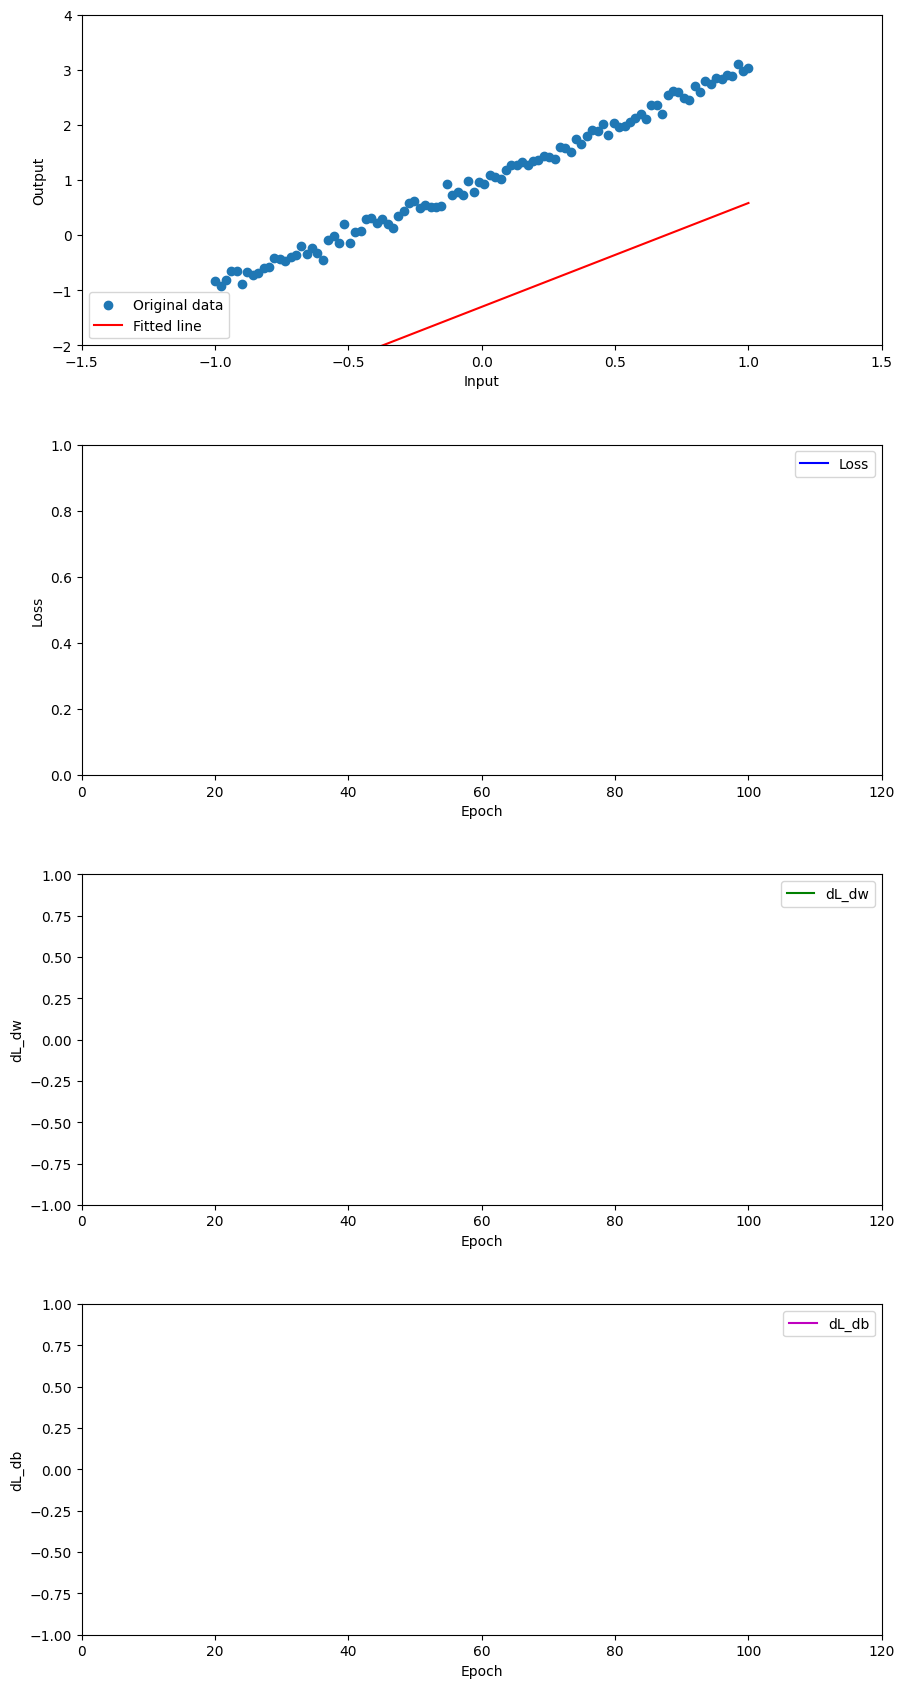

In [374]:
# Training function with visualization
fig, axs = plt.subplots(4, 1, figsize=(10, 18))
plt.subplots_adjust(left=0.1, right=0.9, top=0.95, bottom=0.05, hspace=0.3)

# Initialize plots
ax1, ax2, ax3, ax4 = axs

# Plot for original data and fitted line
ax1.scatter(x, y, label='Original data')
fitted_line, = ax1.plot(x, forward_pass(x, weight, bias), label='Fitted line', color='r')
input_text = ax1.text(0.1, 0.5, '', transform=ax1.transAxes)
weight_text = ax1.text(0.5, 0.6, '', transform=ax1.transAxes)
bias_text = ax1.text(0.5, 0.4, '', transform=ax1.transAxes)
output_text = ax1.text(0.9, 0.5, '', transform=ax1.transAxes)
epoch_loss_text = ax1.text(0.02, 0.95, '', transform=ax1.transAxes)
ax1.set_xlim(-1.5, 1.5)
ax1.set_ylim(-2, 4)
ax1.set_xlabel('Input')
ax1.set_ylabel('Output')
ax1.legend()

# Plot for loss
loss_values = []
loss_line, = ax2.plot([], [], label='Loss', color='b')
ax2.set_xlim(0, epochs)
ax2.set_ylim(0, 1)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

# Plot for gradient dL_dw
dw_values = []
dw_line, = ax3.plot([], [], label='dL_dw', color='g')
ax3.set_xlim(0, epochs)
ax3.set_ylim(-1, 1)
ax3.set_xlabel('Epoch')
ax3.set_ylabel('dL_dw')
ax3.legend()

# Plot for gradient dL_db
db_values = []
db_line, = ax4.plot([], [], label='dL_db', color='m')
ax4.set_xlim(0, epochs)
ax4.set_ylim(-1, 1)
ax4.set_xlabel('Epoch')
ax4.set_ylabel('dL_db')
ax4.legend()